In [12]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [14]:
# tickers = ['ACWI', 'VEA', 'EEM', 'AIA', 'AGG', 'EMB', 'TIP']
# tickers = ['VTI', 'TLT', 'IEF', 'DBC', 'GLD']
tickers = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
adjClose = pd.DataFrame()

In [15]:
for ticker in tickers:
    adjClose[ticker] = web.get_data_yahoo(ticker, start='2007-01-01')['Adj Close']
adjClose.info()

# FinanceDataReader의 경우 과거의 데이터가 잘 조회되지 않는 문제가 있었음
# for ticker in tickers:
#     adjClose[ticker] = fdr.DataReader(ticker, start='2010-01-01')['Close']
# adjClose.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3745 entries, 2007-01-03 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3745 non-null   float64
 1   F       3745 non-null   float64
 2   AMZN    3745 non-null   float64
 3   GE      3745 non-null   float64
 4   TSLA    2867 non-null   float64
dtypes: float64(5)
memory usage: 175.5 KB


In [16]:
dailySimpleReturns = adjClose.pct_change()
dailySimpleReturns

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.025300,0.005168,-0.005794,NaN
2007-01-05,-0.007122,-0.010389,-0.013625,-0.005033,NaN
2007-01-08,0.004938,0.014436,-0.022674,-0.000266,NaN
2007-01-09,0.083070,0.007762,0.007467,0.000000,NaN
...,...,...,...,...,...
2021-11-09,0.002459,-0.001489,0.025007,0.026471,-0.119903
2021-11-10,-0.019163,-0.037773,-0.026335,-0.020936,0.043429
2021-11-11,-0.000338,0.009814,-0.002743,-0.017988,-0.004157


In [17]:
meanReturns = dailySimpleReturns.mean()
annualReturns = meanReturns * 250
annualReturns

AAPL    0.323125
F       0.183487
AMZN    0.371887
GE      0.023508
TSLA    0.623153
dtype: float64

In [18]:
numAssets = len(tickers) # 종목 수
weights = np.random.random(numAssets)
weights /= np.sum(weights)
portReturnsExpected = np.sum(weights * meanReturns.T)
# 포트폴리오 가중평균 기대수익율
portReturnsExpected

0.0010840236862934942

In [19]:
# 행렬연산을 위하여 weights를 matirx 데이터형으로 변환
weights = np.matrix(weights)

# dailySimpleReturns는 pandas의 DataFrame개체이다
print('dailySimpleReturns의 데이터형: ',type(dailySimpleReturns))

# DataFrame 개체는 공분산을 계산해주는 cov함수를 제공한다.
# cov 함수는 DataFrame을 돌려준다
print('dailySimpleReturns.cov() 결과의 데이터형: ',type(dailySimpleReturns.cov()))

# 행렬연산을 위하여 cov()함수로 공분산한 결과를 
# 바로 values함수를 사용하여 행렬로 변환한다
pcov=dailySimpleReturns.cov().values

# 행렬연산으로 분산을 계산한다
varp = weights*pcov*weights.T 
print('포트폴리오 분산은 ', varp)

dailySimpleReturns의 데이터형:  <class 'pandas.core.frame.DataFrame'>
dailySimpleReturns.cov() 결과의 데이터형:  <class 'pandas.core.frame.DataFrame'>
포트폴리오 분산은  [[0.00028707]]


In [20]:
dailyCov = dailySimpleReturns.cov()
annualCov = dailyCov * 250


In [21]:
portfolioReturns = []
portfolioVolatility = []
portfolioWeights = []

numPortfolios = 30000

for n in range(numPortfolios):
    weights = np.random.random(numAssets)
    weights /= np.sum(weights)
    returns = np.dot(weights, annualReturns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annualCov, weights)))
    portfolioReturns.append(returns)
    portfolioVolatility.append(volatility)
    portfolioWeights.append(weights)

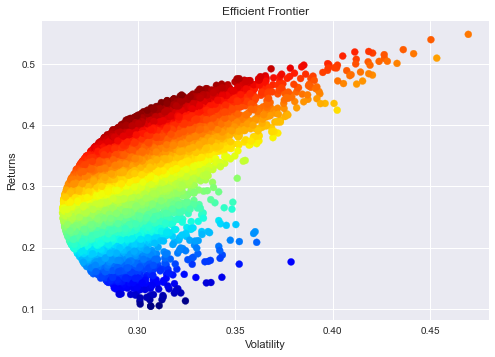

In [22]:
portfolioVolatility = np.array(portfolioVolatility)
portfolioReturns = np.array(portfolioReturns)
colors = portfolioReturns / portfolioVolatility
plt.style.use('seaborn')
plt.scatter(portfolioVolatility, portfolioReturns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()